<a href="https://colab.research.google.com/github/BhagyashreePagar/Dashboard/blob/main/sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.chdir('/content/drive/My Drive')

In [ ]:
fromfrom google.colab import drive
drdrivedrdriveiveive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip handsign.zip

Streaming output truncated to the last 5000 lines.
  inflating: sign/validation/love/820.jpg  
  inflating: sign/validation/love/821.jpg  
  inflating: sign/validation/love/822.jpg  
  inflating: sign/validation/love/823.jpg  
  inflating: sign/validation/love/824.jpg  
  inflating: sign/validation/love/825.jpg  
  inflating: sign/validation/love/826.jpg  
  inflating: sign/validation/love/827.jpg  
  inflating: sign/validation/love/828.jpg  
  inflating: sign/validation/love/829.jpg  
  inflating: sign/validation/love/83.jpg  
  inflating: sign/validation/love/830.jpg  
  inflating: sign/validation/love/831.jpg  
  inflating: sign/validation/love/832.jpg  
  inflating: sign/validation/love/833.jpg  
  inflating: sign/validation/love/834.jpg  
  inflating: sign/validation/love/835.jpg  
  inflating: sign/validation/love/836.jpg  
  inflating: sign/validation/love/837.jpg  
  inflating: sign/validation/love/838.jpg  
  inflating: sign/validation/love/839.jpg  
  inflating: sign/validati

In [ ]:
!pwd

/content/drive/My Drive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "sign/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "sign/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "sign/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 19200 files belonging to 8 classes.
Found 19200 files belonging to 8 classes.
Found 19200 files belonging to 8 classes.


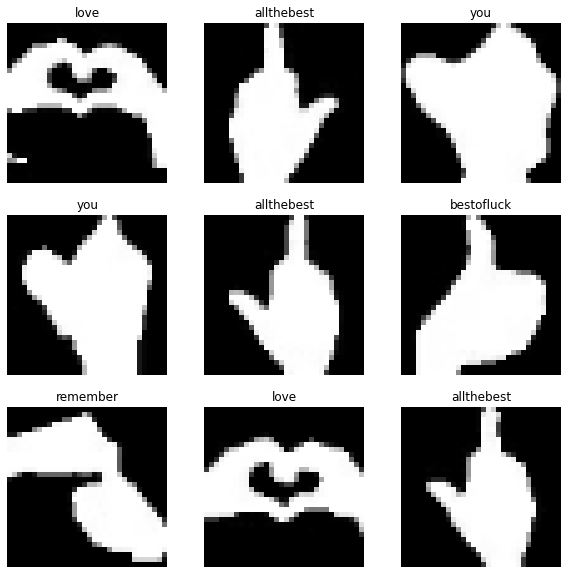

In [ ]:
class_names = ["Ime", "Like","allthebest","bestofluck","iloveu","love","remember","you"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(8)
    ]
)

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 5
)

Epoch 1/5
960/960 [==============================] - 101s 105ms/step - loss: 2.9365e-06 - accuracy: 1.0000 - val_loss: 2.0313e-06 - val_accuracy: 1.0000
Epoch 2/5
960/960 [==============================] - 89s 93ms/step - loss: 1.5322e-06 - accuracy: 1.0000 - val_loss: 1.0763e-06 - val_accuracy: 1.0000
Epoch 3/5
960/960 [==============================] - 90s 93ms/step - loss: 8.2526e-07 - accuracy: 1.0000 - val_loss: 5.8782e-07 - val_accuracy: 1.0000
Epoch 4/5
960/960 [==============================] - 94s 98ms/step - loss: 4.5307e-07 - accuracy: 1.0000 - val_loss: 3.2495e-07 - val_accuracy: 1.0000
Epoch 5/5
960/960 [==============================] - 95s 99ms/step - loss: 2.5292e-07 - accuracy: 1.0000 - val_loss: 1.8619e-07 - val_accuracy: 1.0000


In [ ]:
model.evaluate(test_ds)

960/960 [==============================] - 69s 72ms/step - loss: 1.8619e-07 - accuracy: 1.0000


[1.8618892738686554e-07, 1.0]

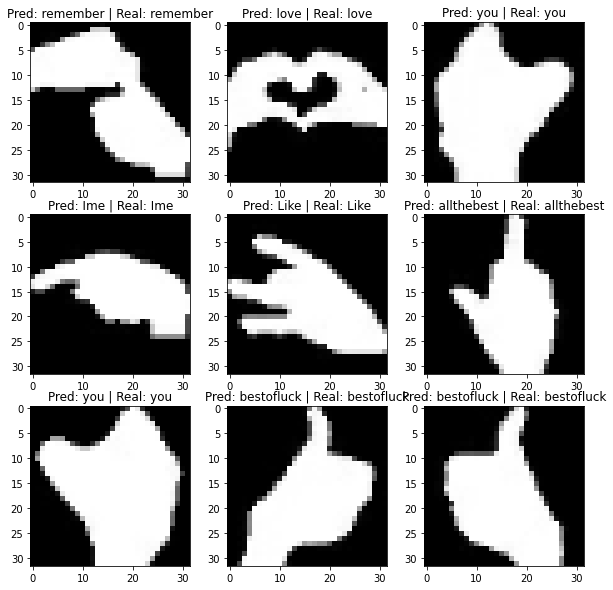

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)